I. Importing libraries

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import sklearn
import pyxlsb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler


II. Descriptive analysis

In [132]:
df = pd.read_excel('Churn_prediction_data.xlsb', sheet_name= 'Customer usage')

In [3]:
df.head()

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_reloads_sum,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage
0,2013,6,376265,15859,1,1,2.68,12.32,1,1,...,15.0,81.60,0.0,62.60,0.0,22,0,22,0,0.0
1,2013,6,1151965,60,0,13,0.64,4.77,1,0,...,10.0,67.23,0.0,1.03,0.0,5,0,3,0,0.0
2,2013,6,1036474,15860,1,1,7.27,19.73,1,1,...,27.0,90.40,0.0,46.68,0.0,108,43,56,0,0.0
3,2013,6,934461,142,0,2,13.93,9.00,1,0,...,36.0,201.25,0.0,183.03,0.0,5,0,5,0,0.0
4,2013,6,1129623,176,0,1,28.97,6.46,1,1,...,36.5,91.10,0.0,74.90,0.0,67,0,63,2,0.0


In [4]:
df.shape

(182343, 65)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182343 entries, 0 to 182342
Data columns (total 65 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   year                                        182343 non-null  int64  
 1   month                                       182343 non-null  int64  
 2   user_account_id                             182343 non-null  int64  
 3   user_lifetime                               182343 non-null  int64  
 4   user_intake                                 182343 non-null  int64  
 5   user_no_outgoing_activity_in_days           182343 non-null  int64  
 6   user_account_balance_last                   182343 non-null  float64
 7   user_spendings                              182343 non-null  float64
 8   user_has_outgoing_calls                     182343 non-null  int64  
 9   user_has_outgoing_sms                       182343 non-null  int64  
 

In [133]:
df.describe(include='all')

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_reloads_sum,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage
count,182343.0,182343.000000,1.823430e+05,182343.000000,182343.000000,182343.000000,182343.000000,182343.000000,182343.000000,182343.000000,...,182343.000000,182343.000000,182343.000000,182343.000000,182343.000000,182343.000000,182343.000000,182343.000000,182343.000000,182343.000000
mean,2013.0,7.048332,5.391688e+05,2808.130304,0.025408,44.290595,10.538393,7.132206,0.883933,0.657557,...,23.300721,104.198263,1.496591,68.562243,4.323101,111.818337,8.023039,68.344806,4.351151,7.932463
std,0.0,0.823645,4.065027e+05,4938.755604,0.157362,220.602367,18.788239,14.262543,0.320306,0.474528,...,43.497493,190.701399,9.934580,144.473632,25.362086,270.297411,40.320652,190.863362,23.689237,106.455476
min,2013.0,6.000000,1.300000e+01,0.000000,0.000000,0.000000,0.000000,-30.060000,0.000000,0.000000,...,-25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,6.000000,2.159060e+05,435.000000,0.000000,1.000000,0.860000,0.120000,1.000000,0.000000,...,0.000000,5.870000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.0,7.000000,3.967280e+05,1058.000000,0.000000,2.000000,6.100000,2.730000,1.000000,1.000000,...,12.000000,40.130000,0.000000,20.400000,0.000000,22.000000,0.000000,8.000000,0.000000,0.000000
75%,2013.0,8.000000,9.862500e+05,1956.000000,0.000000,5.000000,13.820000,8.430000,1.000000,1.000000,...,29.515000,122.800000,0.000000,75.400000,0.000000,112.000000,2.000000,60.000000,0.000000,0.000000
max,2013.0,8.000000,1.196944e+06,15947.000000,1.000000,1307.000000,1791.680000,1236.470000,1.000000,1.000000,...,3000.000000,6734.930000,1323.750000,6500.000000,3033.500000,18637.000000,6198.000000,13860.000000,4692.000000,13135.490000


In [176]:
df.duplicated().sum()

0

In [177]:
df.isnull().sum()

year                                     0
month                                    0
user_account_id                          0
user_lifetime                            0
user_intake                              0
                                        ..
last_100_sms_outgoing_to_onnet_count     0
last_100_sms_outgoing_to_offnet_count    0
last_100_sms_outgoing_to_abroad_count    0
last_100_gprs_usage                      0
budget                                   0
Length: 66, dtype: int64

In [134]:
df.corr()

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_reloads_sum,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,0.093849,0.102321,0.032161,-0.132824,-0.022526,-0.039088,0.027646,-0.042152,...,-0.038166,-0.047696,0.021026,-0.053348,0.021859,-0.020739,-0.010314,-0.019126,0.023747,0.012083
user_account_id,NaN,0.093849,1.000000,0.294911,0.209968,0.083050,-0.124531,-0.028441,-0.253717,-0.228052,...,-0.034889,-0.063962,-0.037147,-0.052773,-0.037665,-0.044589,-0.015076,-0.007649,-0.039313,0.010675
user_lifetime,NaN,0.102321,0.294911,1.000000,0.228411,0.341326,-0.163535,-0.165737,-0.521458,-0.419915,...,-0.182195,-0.196299,-0.051711,-0.171748,-0.058966,-0.150228,-0.072850,-0.133278,-0.063368,-0.026215
user_intake,NaN,0.032161,0.209968,0.228411,1.000000,-0.027090,0.003319,0.015790,0.048499,0.061144,...,-0.016566,-0.062278,-0.017221,-0.058227,-0.019276,-0.042481,-0.020537,-0.033665,-0.018993,0.002968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
last_100_sms_outgoing_count,NaN,-0.020739,-0.044589,-0.150228,-0.042481,-0.080434,0.016918,0.433123,0.132216,0.277938,...,0.451385,0.252271,0.049933,0.234613,0.063579,1.000000,0.302431,0.880184,0.307098,0.074745
last_100_sms_outgoing_to_onnet_count,NaN,-0.010314,-0.015076,-0.072850,-0.020537,-0.038697,0.030615,0.129226,0.061175,0.135953,...,0.143000,0.106592,0.016563,0.108676,0.021025,0.302431,1.000000,0.132411,0.056938,0.040660
last_100_sms_outgoing_to_offnet_count,NaN,-0.019126,-0.007649,-0.133278,-0.033665,-0.069483,0.011538,0.373501,0.111525,0.237771,...,0.384088,0.157160,0.019502,0.154704,0.016659,0.880184,0.132411,1.000000,0.210952,0.055859
last_100_sms_outgoing_to_abroad_count,NaN,0.023747,-0.039313,-0.063368,-0.018993,-0.035586,0.063989,0.178914,0.057385,0.124717,...,0.188868,0.098770,0.288806,0.035794,0.380165,0.307098,0.056938,0.210952,1.000000,0.041115


In [143]:
df.corr().unstack().sort_values().drop_duplicates()

user_has_outgoing_sms                  sms_outgoing_inactive_days          -0.804826
calls_outgoing_to_onnet_inactive_days  user_has_outgoing_calls             -0.777131
user_use_gprs                          gprs_inactive_days                  -0.757149
user_does_reload                       reloads_inactive_days               -0.643905
user_lifetime                          user_has_outgoing_calls             -0.521458
                                                                              ...   
calls_outgoing_to_onnet_duration       calls_outgoing_to_onnet_spendings    0.908132
gprs_usage                             gprs_session_count                   0.913488
sms_outgoing_to_offnet_count           sms_outgoing_to_offnet_spendings     0.972336
last_100_gprs_usage                    last_100_gprs_usage                  1.000000
year                                   year                                      NaN
Length: 1715, dtype: float64

*After exploring the dataset, short comments would be:
1. No missing values. Usually it is an issue but here there is no such problem.
2. Many outliers can be spottted (generally difference between mean and min/max values)
3. Data is not refined. Right now it won't produce accurate models. 
4. Some columns have high correlation between them. For instance 'sms_outgoing_to_offnet_count' and   sms_outgoing_to_offnet_spendings (above 90 %). If both columns are used in a model it would be prone to overfitting.

CUSTOMER SEGMENTATION

In [135]:
df['budget'] = df['user_account_balance_last'] + df ['user_spendings']

In [136]:
df['budget'].head()

0    15.00
1     5.41
2    27.00
3    22.93
4    35.43
Name: budget, dtype: float64

Text(0.5, 1.0, 'Distribution of Budget')

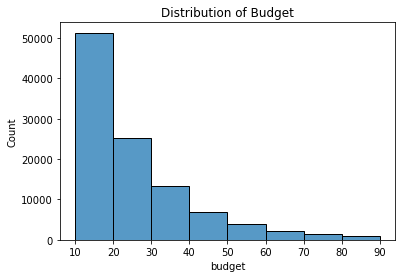

In [144]:
sns.histplot(data=df, x='budget', bins = list(range(10, 100, 10)))
plt.title("Distribution of Budget")

In [178]:
new_df = df.drop_duplicates()
col_names = ['budget']
features = new_df[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_features = pd.DataFrame(features, columns = col_names)

Chosen model for client segmentation: KMeans

Text(0, 0.5, 'Inertia')

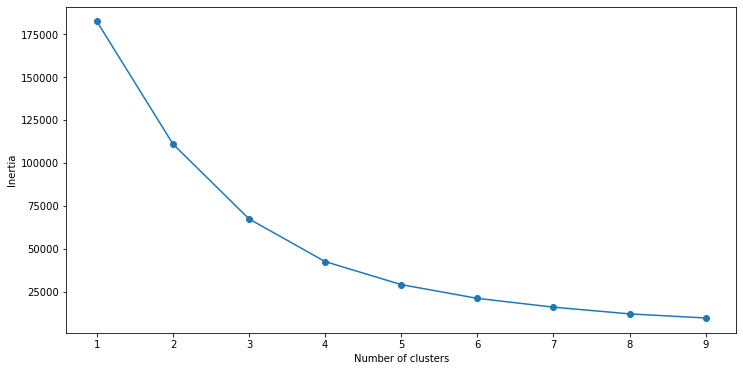

In [140]:
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(scaled_features)
    SSE.append(kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [166]:
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(scaled_features)

KMeans(n_clusters=4)

In [167]:
pred = kmeans.predict(scaled_features)
frame = pd.DataFrame(new_df)
frame['cluster'] = pred

In [168]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

In [169]:
kmeans.fit(new_df)

KMeans(n_clusters=4, random_state=42)

In [170]:
df_segm = new_df.groupby(['budget']).mean()
df_segm

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage,cluster
budget,,,,,,,,,,,,,,,,,,,,,
-10.45,2013.0,8.0,1179951.0,19.0,1.0,0.0,19.61,-30.06,1.0,1.0,...,45.28,0.00,8.07,0.00,47.0,8.0,1.0,0.0,3485.10,0.0
-7.10,2013.0,8.0,1106641.0,278.0,0.0,1.0,12.11,-19.21,1.0,1.0,...,111.08,0.00,32.15,0.00,36.0,1.0,1.0,0.0,1427.65,0.0
-5.53,2013.0,8.0,1183791.0,15934.0,1.0,0.0,0.05,-5.58,1.0,1.0,...,7.00,0.00,2.00,0.00,1.0,0.0,0.0,0.0,1485.88,0.0
-3.33,2013.0,7.0,1107601.0,39.0,0.0,0.0,23.02,-26.35,1.0,0.0,...,2.90,0.00,0.00,0.00,1.0,0.0,0.0,0.0,1530.10,0.0
-0.10,2013.0,8.0,441065.0,717.0,0.0,2.0,0.10,-0.20,1.0,0.0,...,163.30,0.00,143.15,0.00,7.0,3.0,1.0,0.0,4.26,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483.49,2013.0,6.0,210663.0,1978.0,0.0,1.0,973.38,510.11,1.0,1.0,...,3084.52,47.80,1035.62,494.12,470.0,135.0,17.0,208.0,2325.66,3.0
1759.58,2013.0,6.0,149340.0,1986.0,0.0,1.0,1446.65,312.93,1.0,1.0,...,1843.22,130.53,313.88,629.58,295.0,37.0,7.0,162.0,5571.22,3.0
1775.71,2013.0,7.0,337262.0,1436.0,0.0,2.0,1775.41,0.30,1.0,1.0,...,85.22,22.58,16.73,57.35,73.0,6.0,19.0,35.0,0.00,3.0


In [154]:
df_segm.rename({0:'potential',
                1:'small',
                2:'standard',
                3:'important'})

,year,month,user_account_id,user_lifetime,user_intake,user_no_outgoing_activity_in_days,user_account_balance_last,user_spendings,user_has_outgoing_calls,user_has_outgoing_sms,...,last_100_reloads_sum,last_100_calls_outgoing_duration,last_100_calls_outgoing_to_onnet_duration,last_100_calls_outgoing_to_offnet_duration,last_100_calls_outgoing_to_abroad_duration,last_100_sms_outgoing_count,last_100_sms_outgoing_to_onnet_count,last_100_sms_outgoing_to_offnet_count,last_100_sms_outgoing_to_abroad_count,last_100_gprs_usage
budget,,,,,,,,,,,,,,,,,,,,,
-10.45,2013.0,8.0,1179951.0,19.0,1.0,0.0,19.61,-30.06,1.0,1.0,...,19.015,45.28,0.00,8.07,0.00,47.0,8.0,1.0,0.0,3485.10
-7.10,2013.0,8.0,1106641.0,278.0,0.0,1.0,12.11,-19.21,1.0,1.0,...,12.000,111.08,0.00,32.15,0.00,36.0,1.0,1.0,0.0,1427.65
-5.53,2013.0,8.0,1183791.0,15934.0,1.0,0.0,0.05,-5.58,1.0,1.0,...,2.515,7.00,0.00,2.00,0.00,1.0,0.0,0.0,0.0,1485.88
-3.33,2013.0,7.0,1107601.0,39.0,0.0,0.0,23.02,-26.35,1.0,0.0,...,-5.000,2.90,0.00,0.00,0.00,1.0,0.0,0.0,0.0,1530.10
-0.10,2013.0,8.0,441065.0,717.0,0.0,2.0,0.10,-0.20,1.0,0.0,...,24.000,163.30,0.00,143.15,0.00,7.0,3.0,1.0,0.0,4.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1483.49,2013.0,6.0,210663.0,1978.0,0.0,1.0,973.38,510.11,1.0,1.0,...,2000.000,3084.52,47.80,1035.62,494.12,470.0,135.0,17.0,208.0,2325.66
1759.58,2013.0,6.0,149340.0,1986.0,0.0,1.0,1446.65,312.93,1.0,1.0,...,3000.000,1843.22,130.53,313.88,629.58,295.0,37.0,7.0,162.0,5571.22
1775.71,2013.0,7.0,337262.0,1436.0,0.0,2.0,1775.41,0.30,1.0,1.0,...,31.515,85.22,22.58,16.73,57.35,73.0,6.0,19.0,35.0,0.00


/Users/test2017/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


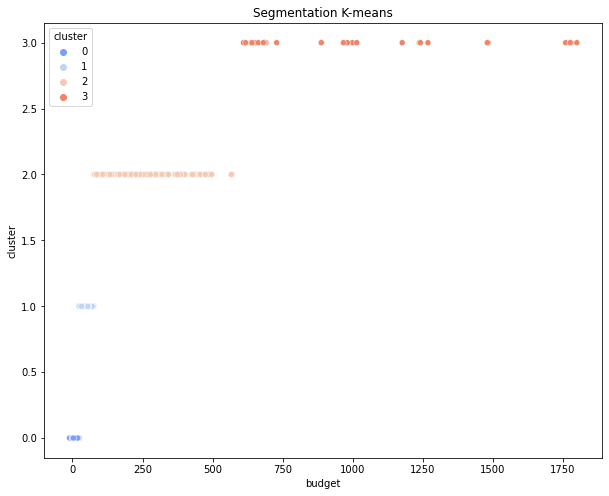

In [173]:
x_axis = new_df['budget']
y_axis = new_df['cluster']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = new_df['cluster'], palette = sns.color_palette('coolwarm', n_colors=4))
plt.title('Segmentation K-means')
plt.show()

III. CHURN PREDICTION MODEL

In [161]:
ch_df = pd.read_excel('Churn_prediction_data.xlsb', sheet_name= 'Customer churners')

In [163]:
df_model = pd.merge(df,ch_df, on ='user_account_id', how ='inner')

Chosen model: Logistic regression

In [164]:
df_logr = df_model[['reloads_inactive_days','user_has_outgoing_calls','user_no_outgoing_activity_in_days','calls_outgoing_count','churn']]

In [165]:
df_logr.head()

,reloads_inactive_days,user_has_outgoing_calls,user_no_outgoing_activity_in_days,calls_outgoing_count,churn
0,25,1,1,100,0
1,19,1,2,122,0
2,3,1,2,87,0
3,27,1,13,20,0
4,30,1,0,12,0


In [106]:
df.fillna(df_logr['user_no_outgoing_activity_in_days'].mean())
X = np.array(df_logr['user_no_outgoing_activity_in_days']).reshape(-1, 1)
y = np.array(df_logr['churn']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
 
# Splitting the data into training and testing data
logisticRegr = LogisticRegression()
 
logisticRegr.fit(X_train, y_train)
print(logisticRegr.score(X_test, y_test))

/Users/test2017/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8478918966349318


Show the model performance

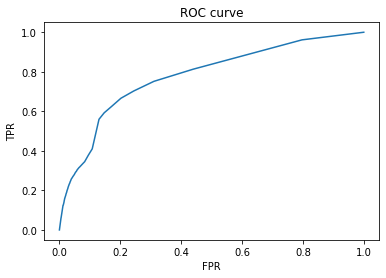

In [107]:
y_pred_proba = logisticRegr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr,tpr)
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.title('ROC curve')
plt.show()